# Singular Value Decomposition

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Plot style
sns.set()
%pylab inline
pylab.rcParams['figure.figsize'] = (4, 4)
# Avoid inaccurate floating values (for inverse matrices in dot product for instance)
# See https://stackoverflow.com/questions/24537791/numpy-matrix-inversion-rounding-errors
np.set_printoptions(suppress=True)

Populating the interactive namespace from numpy and matplotlib


In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [24]:
def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        if (isinstance(alpha, list)):
            alpha_i = alpha[i]
        else:
            alpha_i = alpha
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                  alpha=alpha_i)

## Diagonal matrix

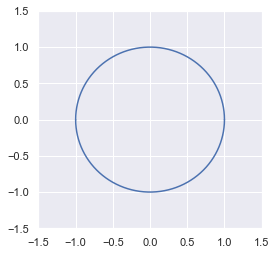

In [20]:
x = np.linspace(-1, 1, 100000)
y = np.sqrt(1-(x**2))
plt.plot(x, y, sns.color_palette().as_hex()[0])
plt.plot(x, -y, sns.color_palette().as_hex()[0])
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

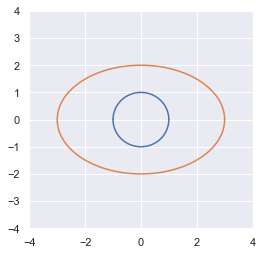

In [21]:
x1 = np.linspace(-3, 3, 100000)
y1 = 2*np.sqrt(1-((x1/3)**2))
plt.plot(x, y, sns.color_palette().as_hex()[0])
plt.plot(x, -y, sns.color_palette().as_hex()[0])
plt.plot(x1, y1, sns.color_palette().as_hex()[1])
plt.plot(x1, -y1, sns.color_palette().as_hex()[1])
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

## Rotation matrix

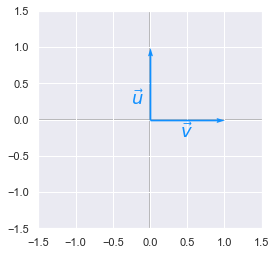

In [25]:
orange = '#FF9A13'
blue = '#1190FF'
    
u = [1,0]
v = [0,1]

plotVectors([u, v], cols=[blue, blue])

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

plt.text(-0.25, 0.2, r'$\vec{u}$', color=blue, size=18)
plt.text(0.4, -0.25, r'$\vec{v}$', color=blue, size=18)
plt.show()

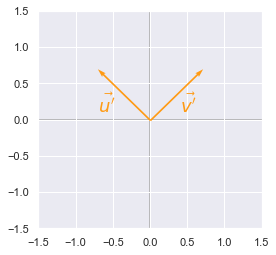

In [26]:
u1 = [-np.sin(np.radians(45)), np.cos(np.radians(45))]
v1 = [np.cos(np.radians(45)), np.sin(np.radians(45))]

plotVectors([u1, v1], cols=[orange, orange])
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

plt.text(-0.7, 0.1, r"$\vec{u'}$", color=orange, size=18)
plt.text(0.4, 0.1, r"$\vec{v'}$", color=orange, size=18)
plt.show()

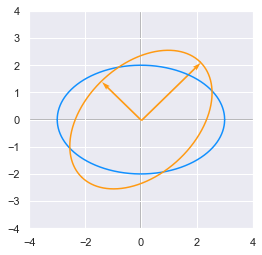

In [27]:
x = np.linspace(-3, 3, 100000)
y = 2*np.sqrt(1-((x/3)**2))

x1 = x*np.cos(np.radians(45)) - y*np.sin(np.radians(45))
y1 = x*np.sin(np.radians(45)) + y*np.cos(np.radians(45))

x1_neg = x*np.cos(np.radians(45)) - -y*np.sin(np.radians(45))
y1_neg = x*np.sin(np.radians(45)) + -y*np.cos(np.radians(45))

u1 = [-2*np.sin(np.radians(45)), 2*np.cos(np.radians(45))]
v1 = [3*np.cos(np.radians(45)), 3*np.sin(np.radians(45))]

plotVectors([u1, v1], cols=['#FF9A13', '#FF9A13'])

plt.plot(x, y, '#1190FF')
plt.plot(x, -y, '#1190FF')

plt.plot(x1, y1, '#FF9A13')
plt.plot(x1_neg, y1_neg, '#FF9A13')

plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

## The three transformations

In [28]:
def matrixToPlot(matrix, vectorsCol=['#FF9A13', '#1190FF']):
    """
    Modify the unit circle and basis vector by applying a matrix.
    Visualize the effect of the matrix in 2D.

    Parameters
    ----------
    matrix : array-like
        2D matrix to apply to the unit circle.
    vectorsCol : HEX color code
        Color of the basis vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure containing modified unit circle and basis vectors.
    """
    # Unit circle
    x = np.linspace(-1, 1, 100000)
    y = np.sqrt(1-(x**2))
    
    # Modified unit circle (separate negative and positive parts)
    x1 = matrix[0,0]*x + matrix[0,1]*y
    y1 = matrix[1,0]*x + matrix[1,1]*y
    x1_neg = matrix[0,0]*x - matrix[0,1]*y
    y1_neg = matrix[1,0]*x - matrix[1,1]*y
    
    # Vectors
    u1 = [matrix[0,0],matrix[1,0]]
    v1 = [matrix[0,1],matrix[1,1]]
    
    plotVectors([u1, v1], cols=[vectorsCol[0], vectorsCol[1]])

    plt.plot(x1, y1, 'g', alpha=0.5)
    plt.plot(x1_neg, y1_neg, 'g', alpha=0.5)

Unit circle:


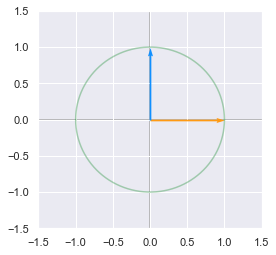

Unit circle transformed by A:


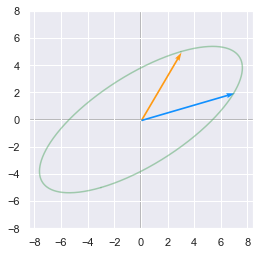

In [36]:
A = np.array([[3, 7], [5, 2]])

print('Unit circle:')
matrixToPlot(np.array([[1, 0], [0, 1]]))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print('Unit circle transformed by A:')
matrixToPlot(A)
plt.xticks(np.arange(-8, 9, 2))
plt.yticks(np.arange(-8, 9, 2))
plt.show()

In [37]:
U, D, V = np.linalg.svd(A)

In [38]:
print(U)

[[-0.85065081 -0.52573111]
 [-0.52573111  0.85065081]]


In [39]:
print(D)

[8.71337969 3.32821489]


In [40]:
print(V)

[[-0.59455781 -0.80405286]
 [ 0.80405286 -0.59455781]]


Unit circle:


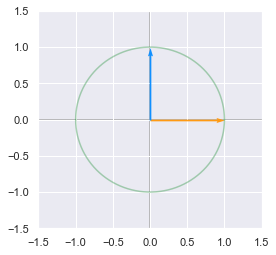

First rotation:


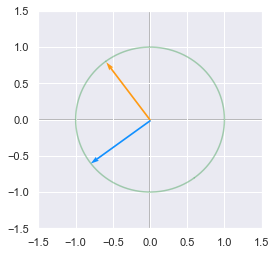

Scaling:


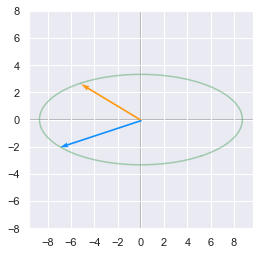

Second rotation:


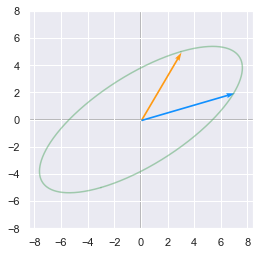

In [47]:
# Unit circle
print('Unit circle:')
matrixToPlot(np.array([[1, 0], [0, 1]]))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print('First rotation:')
matrixToPlot(V)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print('Scaling:')
matrixToPlot(np.diag(D).dot(V))
plt.xticks(np.arange(-8, 9, 2))
plt.yticks(np.arange(-8, 9, 2))
plt.show()

print('Second rotation:')
matrixToPlot(U.dot(np.diag(D)).dot(V))
plt.xticks(np.arange(-8, 9, 2))
plt.yticks(np.arange(-8, 9, 2))
plt.show()

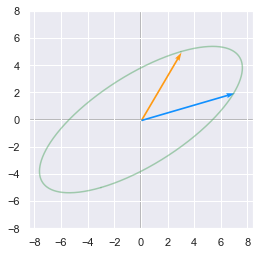

In [48]:
matrixToPlot(A)
plt.xticks(np.arange(-8, 9, 2))
plt.yticks(np.arange(-8, 9, 2))
plt.show()

## Singular values interpretation

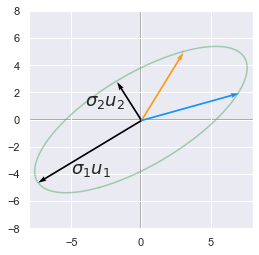

In [49]:
u1 = [D[0]*U[0,0], D[0]*U[0,1]]
v1 = [D[1]*U[1,0], D[1]*U[1,1]]

plotVectors([u1, v1], cols=['black', 'black'])

matrixToPlot(A)

plt.text(-5, -4, r"$\sigma_1u_1$", size=18)
plt.text(-4, 1, r"$\sigma_2u_2$", size=18)

plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

## SVD and eigendecomposition

In [56]:
A = np.array([[7, 2], [3, 4], [5, 3]])
U, D, V = np.linalg.svd(A)

In [57]:
print(U)

[[-0.69366543  0.59343205 -0.40824829]
 [-0.4427092  -0.79833696 -0.40824829]
 [-0.56818732 -0.10245245  0.81649658]]


In [58]:
print(np.linalg.eig(A.dot(A.T))[1])

[[-0.69366543 -0.59343205 -0.40824829]
 [-0.4427092   0.79833696 -0.40824829]
 [-0.56818732  0.10245245  0.81649658]]


In [59]:
print(V)

[[-0.88033817 -0.47434662]
 [ 0.47434662 -0.88033817]]


In [60]:
print(np.linalg.eig(A.T.dot(A))[1])

[[ 0.88033817 -0.47434662]
 [ 0.47434662  0.88033817]]


In [61]:
print(D)

[10.25142677  2.62835484]


In [62]:
print(np.sqrt(np.linalg.eig(A.T.dot(A))[0]))

[10.25142677  2.62835484]


# Apply the SVD on images

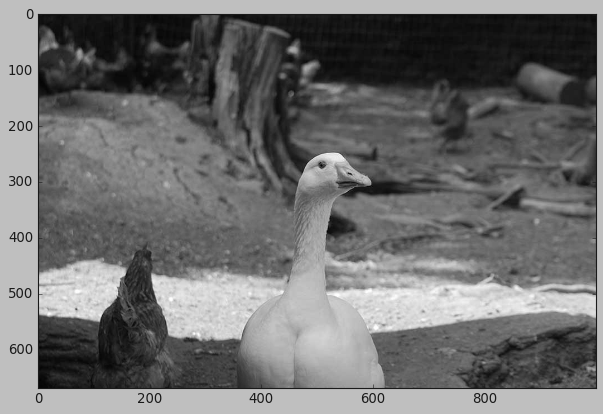

In [63]:
from PIL import Image

plt.style.use('classic')
img = Image.open('data/test_svd.jpg')
# convert image to grayscale
imggray = img.convert('LA')
# convert to numpy array
imgmat = np.array(list(imggray.getdata(band=0)), float)
# Reshape according to orginal image dimensions
imgmat.shape = (imggray.size[1], imggray.size[0])

plt.figure(figsize=(9, 6))
plt.imshow(imgmat, cmap='gray')
plt.show()

In [64]:
U, D, V = np.linalg.svd(imgmat)

In [65]:
imgmat.shape

(669, 1000)

In [66]:
U.shape

(669, 669)

In [67]:
D.shape

(669,)

In [68]:
V.shape

(1000, 1000)

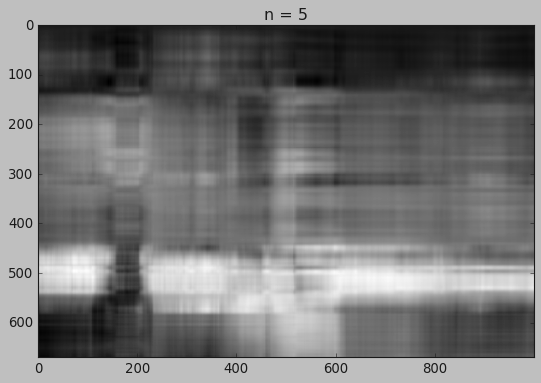

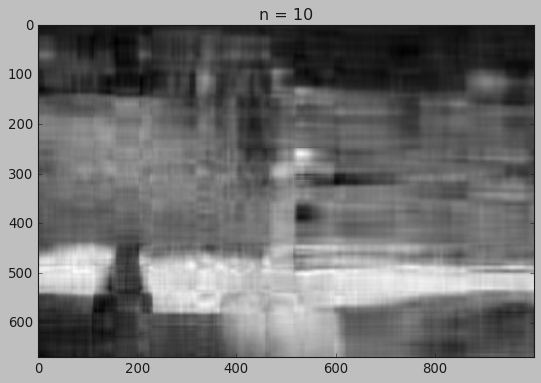

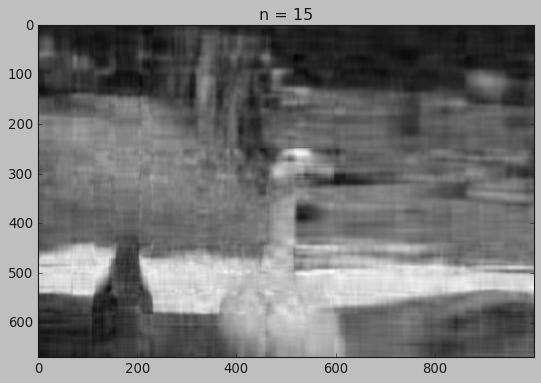

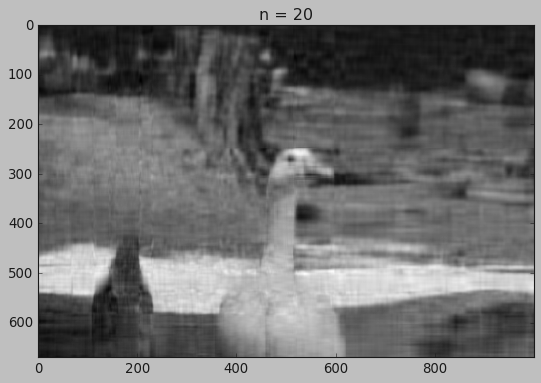

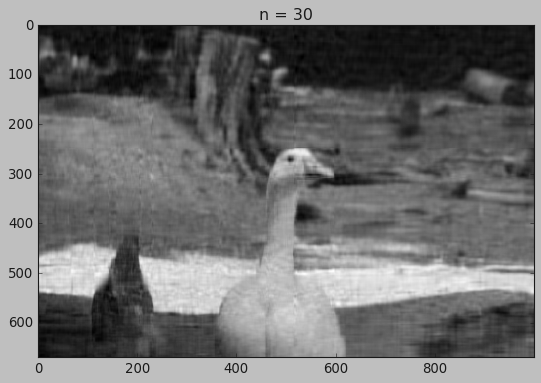

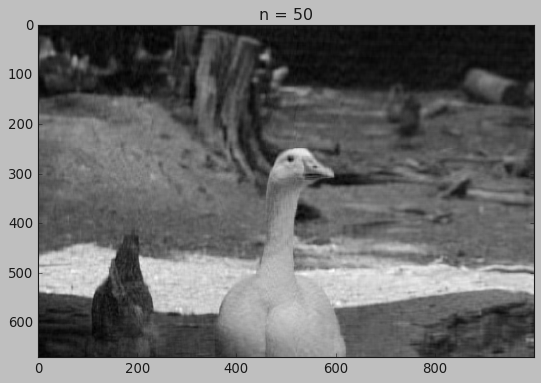

In [69]:
for i in [5, 10, 15, 20, 30, 50]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()